# <font color=blue>Assignments for "Data Exploration - Multivariate Analysis"</font>

In this assignment, you will work on the `Students Performance` ([dataset](https://www.kaggle.com/spscientist/students-performance-in-exams/home)). You can reach the explanations of this data from Kaggle again.

To complete this assignment, submit the Github link of the Jupyter notebook file containing solutions to the questions below. You can talk to your mentor on your head or ask Slack at office time.

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import seaborn as sns
import scipy.stats as stats
from scipy.stats.mstats import winsorize
import warnings

In [2]:
students = pd.read_csv("StudentsPerformance.csv")
students.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


**(1)** Does the performance in the exams vary according to gender, origin and education level of parents?

In [5]:
students.groupby("gender").mean().T

gender,female,male
math score,63.633205,68.728216
reading score,72.608108,65.473029
writing score,72.467181,63.311203


**For math scores, female students have lower scores. Male students have higher scores.**

**For reading scores, male students have lower score than females.**

**For writing scores, female students have higher scores than males.**

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


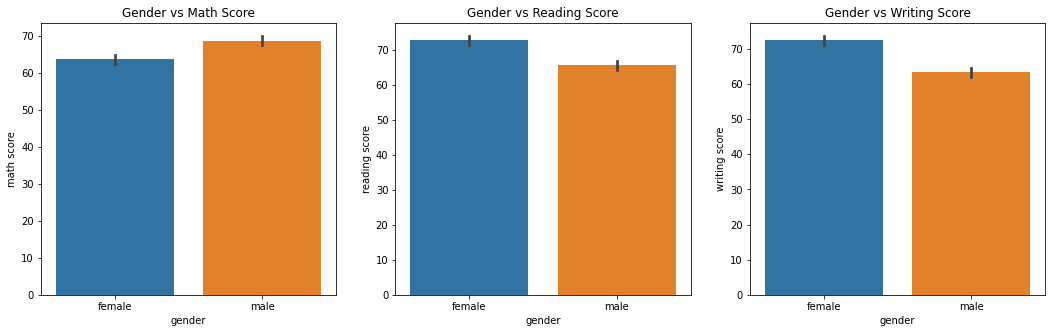

In [8]:
plt.figure(figsize=(18,5))

plt.subplot(1,3,1)
sns.barplot(students["gender"], students["math score"])
plt.title("Gender vs Math Score")

plt.subplot(1,3,2)
sns.barplot(students["gender"], students["reading score"])
plt.title("Gender vs Reading Score")
plt.subplot(1,3,3)
sns.barplot(students["gender"], students["writing score"])
plt.title("Gender vs Writing Score")
plt.show()

In [9]:
students.groupby("race/ethnicity").mean().T

race/ethnicity,group A,group B,group C,group D,group E
math score,61.629213,63.452632,64.463950,67.362595,73.821429
reading score,64.674157,67.352632,69.103448,70.030534,73.028571
writing score,62.674157,65.600000,67.827586,70.145038,71.407143


**Generally all groups are similar each other.**

**Group A has lowest scores in all courses.**

**Group E has highest scores in all courses.**

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


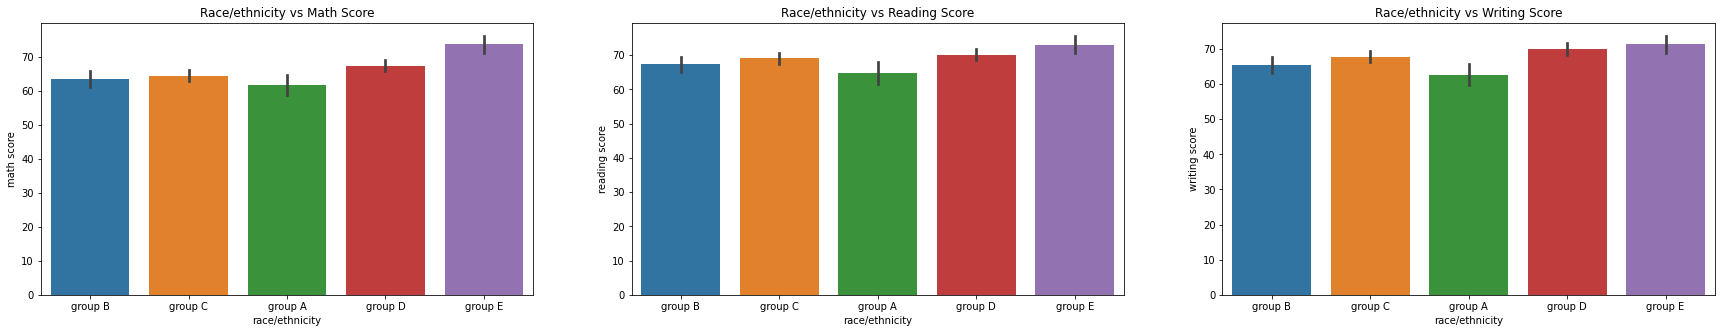

In [11]:
plt.figure(figsize=(30,5))

plt.subplot(1,3,1)
sns.barplot(students["race/ethnicity"], students["math score"])
plt.title("Race/ethnicity vs Math Score")

plt.subplot(1,3,2)
sns.barplot(students["race/ethnicity"], students["reading score"])
plt.title("Race/ethnicity vs Reading Score")
plt.subplot(1,3,3)
sns.barplot(students["race/ethnicity"], students["writing score"])
plt.title("Race/ethnicity vs Writing Score")
plt.show()

In [12]:
students.groupby("parental level of education").mean().T

parental level of education,associate's degree,bachelor's degree,high school,master's degree,some college,some high school
math score,67.882883,69.389831,62.137755,69.745763,67.128319,63.497207
reading score,70.927928,73.000000,64.704082,75.372881,69.460177,66.938547
writing score,69.896396,73.381356,62.448980,75.677966,68.840708,64.888268


**Students whom parents have high school degree, has lowest mean scores than others.** 

**For math scores, associate degree has highest mean scores.**

**For reading and writing scores, master's degree has highest mean scores.**

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


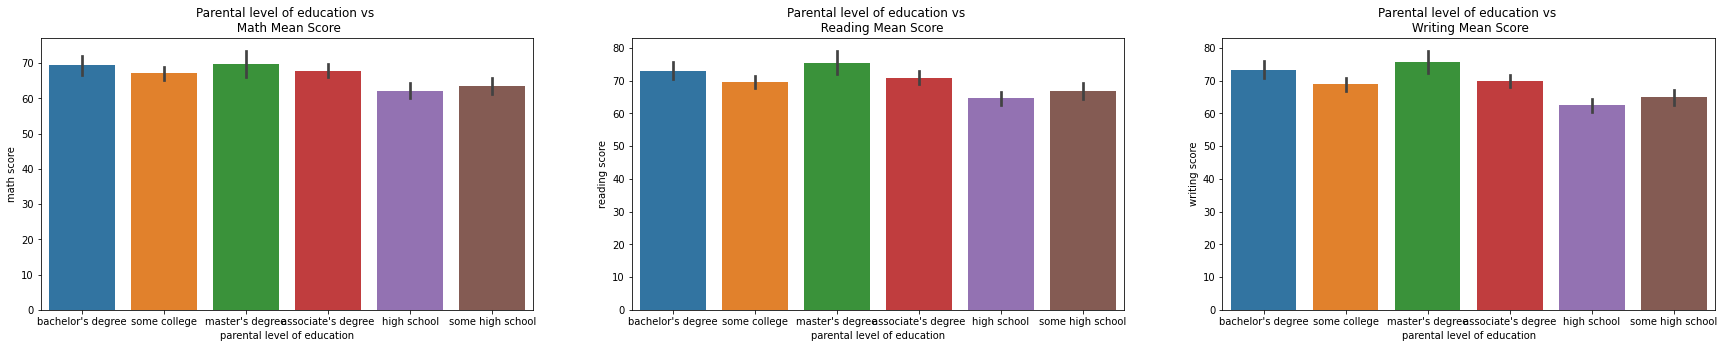

In [14]:
plt.figure(figsize=(30,5))

plt.subplot(1,3,1)
sns.barplot(students["parental level of education"], students["math score"])
plt.title("Parental level of education vs \n Math Mean Score")

plt.subplot(1,3,2)
sns.barplot(students["parental level of education"], students["reading score"])
plt.title("Parental level of education vs \n  Reading Mean Score")
plt.subplot(1,3,3)
sns.barplot(students["parental level of education"], students["writing score"])
plt.title("Parental level of education vs \n Writing Mean Score")
plt.show()

**(2)** Does lunch type have a relationship with exam performances? How can you explain this, if any?

In [15]:
students.groupby("lunch").mean().T

lunch,free/reduced,standard
math score,58.921127,70.034109
reading score,64.653521,71.654264
writing score,63.022535,70.823256


**In all courses, free/reduced lunch type has lowest scores.**

**Standard lunch type has almost same scores for all courses.**

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


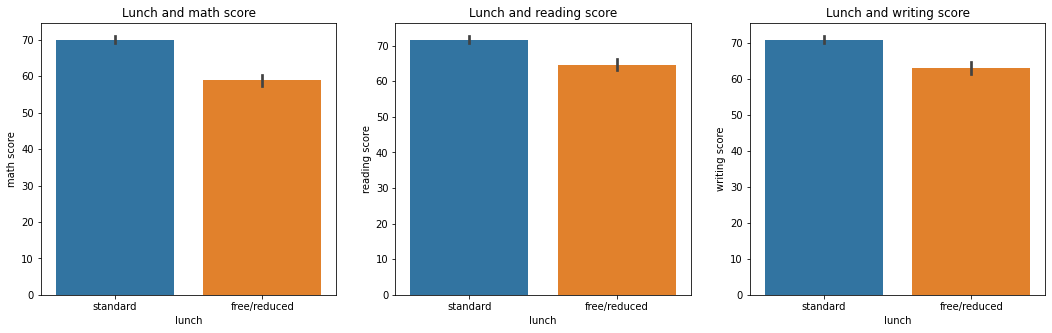

In [16]:
plt.figure(figsize=(18,5))

plt.subplot(1,3,1)
sns.barplot(students["lunch"], students["math score"])
plt.title("Lunch and math score")

plt.subplot(1,3,2)
sns.barplot(students["lunch"], students["reading score"])
plt.title("Lunch and reading score")

plt.subplot(1,3,3)
sns.barplot(students["lunch"], students["writing score"])
plt.title("Lunch and writing score")
plt.show()

In [20]:
# Test whether group differences are significant.
student = students["lunch"].unique()
lunchstu = students.groupby("lunch")

In [21]:
pd.options.display.float_format = '{:.15f}'.format
for var in ["math score", "reading score", "writing score"]:
    comparison = pd.DataFrame(columns=['group_1', 'group_2','statistic', 'p_value'])
    print("For the sake of comparison {}".format(var),end='')
    for i in range(0, len(student)):
        for j in range(i+1, len(student)):
            ttest = stats.ttest_ind(students[students["lunch"]==student[i]][var], 
                                students[students["lunch"]==student[j]][var])
            group_1 = student[i]
            group_2 = student[j]
            statistic = ttest[0]
            p_value = ttest[1]
            
            comparison = comparison.append({"group_1" : group_1 ,
                                                  "group_2" : group_2 ,
                                                  "statistic": statistic , 
                                                  "p_value" : p_value}, ignore_index=True)
    display(comparison)

For the sake of comparison math score

,group_1,group_2,statistic,p_value
0,standard,free/reduced,11.837180472914612,0.000000000000000


For the sake of comparison reading score

,group_1,group_2,statistic,p_value
0,standard,free/reduced,7.451056467473455,0.000000000000200


For the sake of comparison writing score

,group_1,group_2,statistic,p_value
0,standard,free/reduced,8.009784197834758,0.000000000000003


**Math, reading, and writing scores have relationship with lunch type because of p value is so low.(<0.05)**

**(3)** Does the preparation courses have an impact on exam performance?

In [22]:
students.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [23]:
course = students["test preparation course"].unique()
courseg = students.groupby("test preparation course")

In [24]:
pd.options.display.float_format = '{:.15f}'.format
for var in ["math score", "reading score", "writing score"]:
    comparison = pd.DataFrame(columns=['group_1', 'group_2','statistic', 'p_value'])
    print("For the sake of comparison {}".format(var),end='')
    for i in range(0, len(course)):
        for j in range(i+1, len(course)):
            ttest = stats.ttest_ind(students[students["test preparation course"]==course[i]][var], 
                                students[students["test preparation course"]==course[j]][var])
            group_1 = course[i]
            group_2 = course[j]
            statistic = ttest[0]
            p_value = ttest[1]
            
            comparison = comparison.append({"group_1" : group_1 ,
                                                  "group_2" : group_2 ,
                                                  "statistic": statistic , 
                                                  "p_value" : p_value}, ignore_index=True)
    display(comparison)

For the sake of comparison math score

,group_1,group_2,statistic,p_value
0,none,completed,-5.704616417349102,0.000000015359135


For the sake of comparison reading score

,group_1,group_2,statistic,p_value
0,none,completed,-7.871663538941468,0.000000000000009


For the sake of comparison writing score

,group_1,group_2,statistic,p_value
0,none,completed,-10.409173436808748,0.000000000000000


**Math, reading, and writing scores have relationship with test preparation course because of p value is so low.**

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


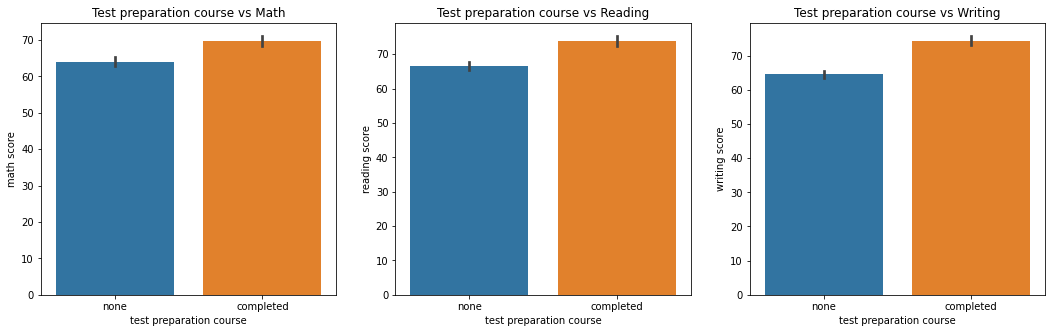

In [26]:
plt.figure(figsize=(18,5))

plt.subplot(1,3,1)
sns.barplot(students["test preparation course"], students["math score"])
plt.title("Test preparation course vs Math")

plt.subplot(1,3,2)
sns.barplot(students["test preparation course"], students["reading score"])
plt.title("Test preparation course vs Reading")

plt.subplot(1,3,3)
sns.barplot(students["test preparation course"], students["writing score"])
plt.title("Test preparation course vs Writing")

plt.show()

In [27]:
students.groupby("test preparation course").mean().T

test preparation course,completed,none
math score,69.695530726256990,64.077881619937699
reading score,73.893854748603346,66.534267912772592
writing score,74.418994413407816,64.504672897196258


**When there is no test preparation, low scores in all courses.**

**(4)** Which lessons are most correlated with each other?

In [28]:
students.corr()

,math score,reading score,writing score
math score,1.000000000000000,0.817579663672053,0.802642045949807
reading score,0.817579663672053,1.000000000000000,0.954598077146248
writing score,0.802642045949807,0.954598077146248,1.000000000000000


**Reading and writing courses are the most correlated with each other.**